# CAR PRICE PREDICTION WITH ML PROJECT


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#PERFORMING EDA

In [4]:
#to see top 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#to see last 5 rows
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
# to see description of  data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# to see statistical description
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#to see columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# to see shape
df.shape

(301, 9)

In [10]:
#To see count of different cars
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [11]:
# to see unique Fuel_Type,Selling_type,Transmission,Owner
a=df['Fuel_Type'].unique()
b=df['Selling_type'].unique()
c=df['Transmission'].unique()
d=df['Owner'].unique()
print("Fuel types are",a)
print("Selling type are",b)
print("Transmission is",c)
print("Owner is",d)

Fuel types are ['Petrol' 'Diesel' 'CNG']
Selling type are ['Dealer' 'Individual']
Transmission is ['Manual' 'Automatic']
Owner is [0 1 3]


In [12]:
# to see correlation
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<AxesSubplot:>

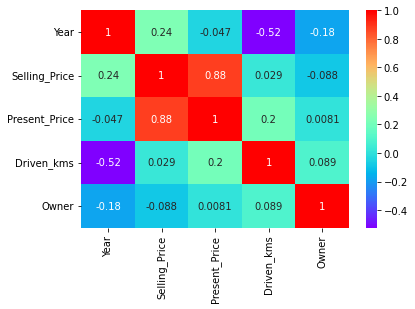

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="rainbow")

<AxesSubplot:>

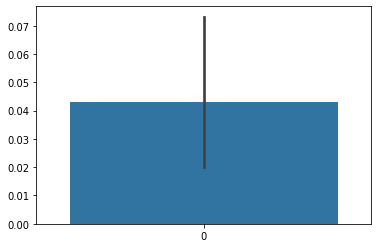

In [14]:
# to see bar distribution of 

sns.barplot(df['Owner'])

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

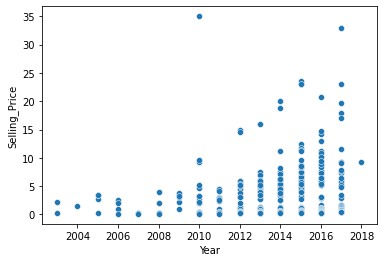

In [15]:
# to see scatter plot for relationship b/w Year and selling price
sns.scatterplot(x="Year",y='Selling_Price',data=df)

<AxesSubplot:xlabel='Year', ylabel='Present_Price'>

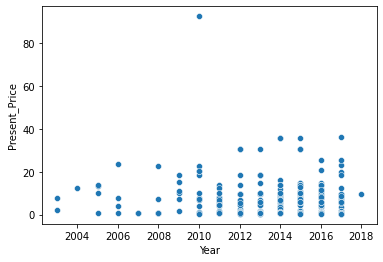

In [16]:
# to see scatter plot for relationship b/w Year and Present price
sns.scatterplot(x="Year",y='Present_Price',data=df)    

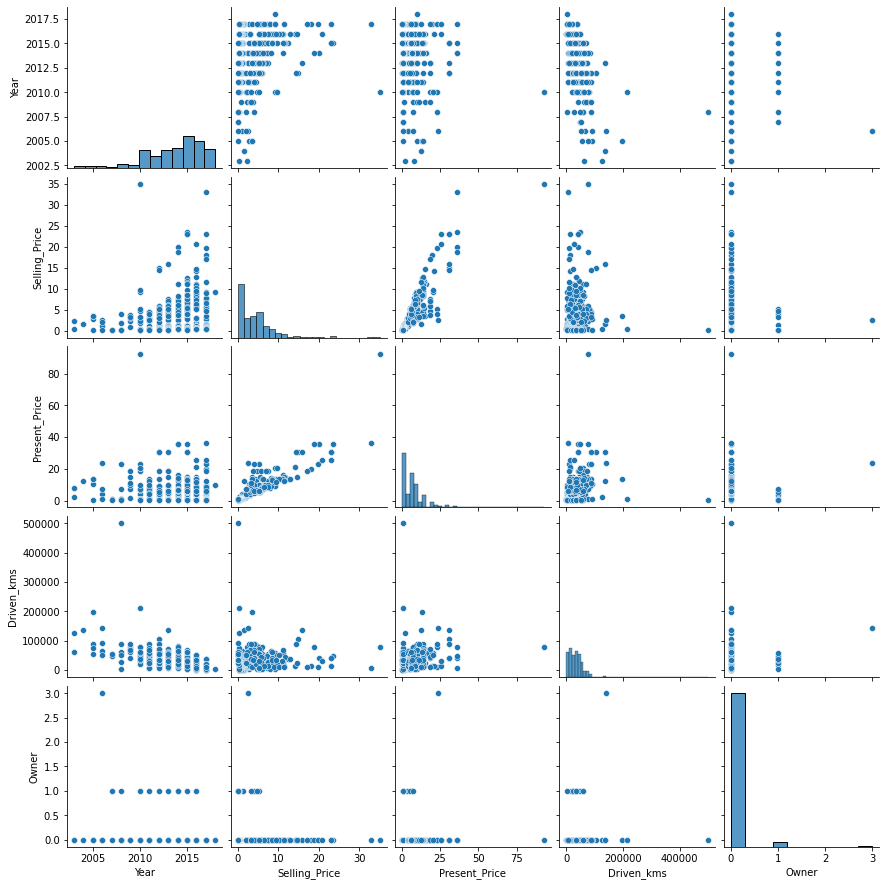

In [17]:
#let visulaize
sns.pairplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Driven_kms'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

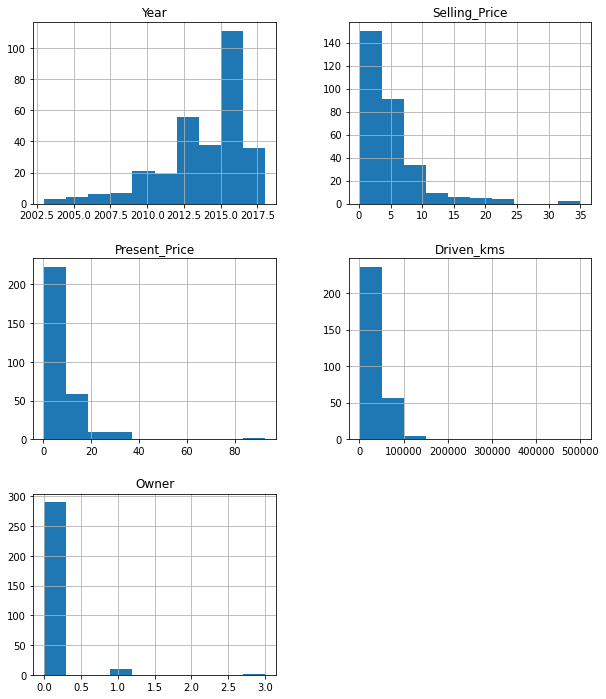

In [18]:
df.hist(bins=10,figsize=(10,12))

In [19]:
# we have maximum of manual transmission based cars
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

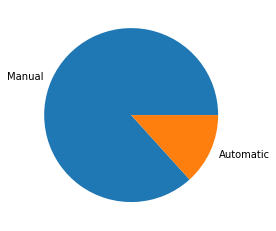

In [20]:
#let visualize it using pie chart
y = np.array([261,40])
transmission_labels = ["Manual","Automatic"]

plt.pie(y, labels = transmission_labels)
plt.show() 

In [21]:
#let's check null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [22]:
#Hence we don't have null values


In [23]:
# dependent and independent for model building
df.drop(['Car_Name','Owner'],axis=1)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [24]:
# Now to apply encoding on few columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])

In [25]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [26]:
#Now extracting independent and dependent values
X = df.drop(['Car_Name', 'Owner', 'Selling_Price'], axis=1)
Y = df[['Selling_Price']]

In [27]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,2,0,1
1,2013,9.54,43000,1,0,1
2,2017,9.85,6900,2,0,1
3,2011,4.15,5200,2,0,1
4,2014,6.87,42450,1,0,1
...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1
297,2015,5.90,60000,2,0,1
298,2009,11.00,87934,2,0,1
299,2017,12.50,9000,1,0,1


In [28]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [29]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)  

In [30]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(X_train, Y_train)  

LinearRegression()

In [31]:
#Prediction of Test and Training set result  
Y_pred= lr.predict(X_test)  
Y_pred

array([[ 7.19619121],
       [-0.52302205],
       [ 4.31785924],
       [ 8.70911441],
       [14.14941135],
       [ 4.94758698],
       [ 3.51523991],
       [ 1.41408658],
       [ 5.32452268],
       [ 4.64040982],
       [ 2.23019359],
       [ 1.59027444],
       [ 5.15493054],
       [ 7.59671543],
       [ 8.30748931],
       [14.15666115],
       [ 7.37794196],
       [ 4.28569218],
       [-0.56046894],
       [ 2.36808415],
       [ 4.94095397],
       [ 4.84236388],
       [ 6.43232541],
       [ 8.15920494],
       [-2.07591437],
       [ 1.92310979],
       [-0.92673657],
       [ 0.75821769],
       [-0.08543288],
       [ 7.06458901],
       [ 4.05509391],
       [ 7.08219244],
       [ 0.65878172],
       [ 7.61131714],
       [ 3.49567266],
       [ 1.78271   ],
       [ 5.63916372],
       [ 6.64418523],
       [-1.88531259],
       [ 8.77529859],
       [ 8.93229668],
       [19.80418198],
       [ 4.43102064],
       [ 4.87499105],
       [ 6.30143972],
       [ 9

In [32]:
lr.coef_

array([[ 4.05742905e-01,  4.33462238e-01, -5.60593479e-06,
        -1.48027631e+00, -1.20992237e+00, -1.38672206e+00]])

In [33]:
lr.intercept_

array([-811.2392109])

In [34]:
Y_test.head(5)

,Selling_Price
223,8.25
150,0.50
226,5.25
296,9.50
52,18.00


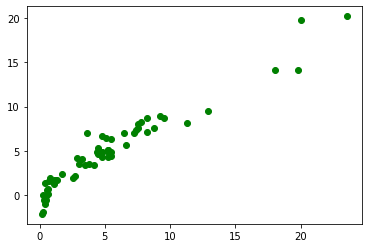

In [35]:
# to plot scatterplot for data
plt.scatter(Y_test, Y_pred,color="green")

In [36]:
#see some metrics
from sklearn import metrics
from sklearn.metrics import r2_score

In [37]:
R2_score=r2_score(Y_test,Y_pred)
R2_score

0.9173959742147934

In [38]:
# find out mean squared error
mse=metrics.mean_squared_error(Y_test,Y_pred)
mse

2.088008274960028

In [39]:
#LET'S PREDICT THE MODEL THROUGH LINEAR REGRESSION
Y_pred1= lr.predict([[2014,5.59,27000,2,0,1]])  
Y_pred1

C:\Users\Akshay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.85141851]])

In [40]:
#Applying Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [42]:
#calculating score
dt_score=dt.score(X_test,Y_test)
dt_pred = dt.predict(X_test)

In [43]:
dt_pred

array([ 6.85,  0.4 ,  4.4 ,  7.75, 14.73,  5.3 ,  3.1 ,  0.45,  3.5 ,
        4.5 ,  3.1 ,  0.9 ,  4.9 ,  6.7 ,  7.75, 14.25,  6.4 ,  4.  ,
        0.45,  1.65,  2.9 ,  4.85,  4.5 ,  9.15,  0.2 ,  0.75,  0.17,
        0.6 ,  0.45,  3.8 ,  2.25,  5.95,  0.45,  8.35,  3.25,  1.2 ,
        5.85,  4.5 ,  0.2 ,  6.25,  7.25, 23.  ,  4.85,  4.4 ,  5.5 ,
       12.5 ,  0.2 ,  0.75,  5.  ,  6.75,  5.35,  3.1 ,  5.  , 23.  ,
        1.11,  1.11,  0.42,  2.  ,  3.9 ,  2.5 ,  3.8 ])

In [44]:
dt_score

0.9441051420379329

In [45]:
# Applying random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_14188\727792064.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestRegressor()

In [46]:
#calculating score
rf_score=rf.score(X_test,Y_test)
rf_pred = rf.predict(X_test)

In [47]:
rf_pred

array([ 6.68  ,  0.4532,  4.5995,  8.5311, 15.2279,  5.2815,  3.173 ,
        0.4356,  3.8115,  4.75  ,  2.882 ,  0.7446,  4.8635,  7.1741,
        7.6939, 15.0932,  6.7376,  4.027 ,  0.4412,  1.594 ,  2.952 ,
        5.0045,  5.1715,  9.7806,  0.1971,  0.7371,  0.3046,  0.6933,
        0.4822,  4.2962,  2.34  ,  5.937 ,  0.489 ,  7.338 ,  3.3135,
        1.1552,  5.649 ,  5.206 ,  0.2437,  7.8885,  7.6955, 22.929 ,
        4.954 ,  4.4155,  5.8395, 11.259 ,  0.2277,  0.7699,  5.3495,
        6.5455,  6.6137,  3.064 ,  5.3125, 25.04  ,  1.168 ,  1.1423,
        0.485 ,  2.4655,  3.4285,  2.702 ,  3.7512])

In [48]:
rf_score

0.9570445081253282

In [49]:
#So, out of linear regression, decision tree regressor,random forest regressor, both random forestand decision tree 
#works better with a good score.

In [50]:
#LET'S PREDICT THE MODEL 
Y_pred2= rf.predict([[2022,5.59,27000,2,0,1]])  
Y_pred2

C:\Users\Akshay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.8045])

In [ ]:
#So here we have predicted the selling price of the car for year 2022

In [ ]:
#---------------------------x------------------------------------------------x-----------------------------------------------